# Single AI crypto concept

In [1]:
from xdata_config import *

## 1 - Imports and fonctions

In [2]:
from functions_module import *

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
2022-11-18 21:31:43.604185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 21:31:43.604332: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-18 21:31:44.019872: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 21:31:48.596662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: N

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense 
from keras.models import load_model

In [4]:
# chking import
MetaData

,0,Pair,launch_week_stamp,launch_day_stamp,launch_minute
0,BTCUSDT,BTC/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
1,LUNAUSDT,LUNA/USDT,1597622400000,1597968000000,2020-08-21 10:00:00
2,ETHUSDT,ETH/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
3,GMTUSDT,GMT/USDT,1646611200000,1646784000000,2022-03-09 12:00:00
4,USTUSDT,UST/USDT,1639958400000,1640304000000,2021-12-24 08:00:00
...,...,...,...,...,...
106,FIDAUSDT,FIDA/USDT,1632700800000,1632960000000,2021-09-30 12:00:00
107,XNOUSDT,XNO/USDT,1642982400000,1643328000000,2022-01-28 08:00:00
108,BTGUSDT,BTG/USDT,1618185600000,1618531200000,2021-04-16 07:00:00
109,GHSTUSDT,GHST/USDT,1629072000000,1629417600000,2021-08-20 10:00:00


In [13]:
def One_pair_AI_Gen(pair="ETH/USDT"):
    ResJS={}
    price_volatility_15m=(100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()
    print(price_volatility_15m)
    df=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,buy_pourcent=max(price_volatility_15m*0.6,BUY_PERCENT),sell_pourcent=SELL_PERCENT)
    print("df original shape "+str(df.shape))
    print(f"df original shape buy mean : {df.buy.mean()*100}")
    df=df.reset_index()
    try:df.pop("num_index")
    except: pass
    try:df.pop("index")
    except: pass
    try:df.pop("date")
    except: pass
    df=data_shufler(df)            
    #df=data_chooser(df,weight=50,row_numbers=df.buy.sum()*2)
    df=data_chooser50(df,row_numbers=500000)
    gc.collect()
    df=data_cleanup(df)
    df=df.dropna()
    print("df choosen data shape"+str(df.shape))
    print(f"pair: {(df.shape[0]/2)==df.buy.sum()}")
    dt=df.to_numpy(dtype=np.float32)
    #dt=df.to_numpy()
    dt=np.nan_to_num(dt,nan=0)
    #dt=dt.astype(np.float32)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 

    ## normalisation
    index_20percent= int(0.2*len(dt[:,0]))
    print(index_20percent)
    if True:
        if True:
        #if True:
            print("normalizing ...")
            mean = dt[index_20percent:, 0:-1].mean(axis=0)
            std = dt[index_20percent:, 0:-1].std(axis=0)



            dt[index_20percent:, 0:-1] -= mean 
            dt[index_20percent:, 0:-1] /= std

            dt[:index_20percent, :-1] -=mean
            dt[:index_20percent, :-1] /= std
            FIRST_NORM_FLAG=False
            ######################### SAVIN NORM ################
            try:
                Normalization={"mean":mean.tolist(),"std":std.tolist()}
                with open(f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json', 'w+') as fp:
                            json.dump(Normalization, fp,  indent=4)
                            print(fp.name)
            except Exception as e:
                print("error Normalization in juppiter")
                print(e)
        else:print("already normalized")
        
    dt=np.nan_to_num(dt,nan=0)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 
    dt=dt.astype(np.float32)
    ## Model
    IN_DIM=dt.shape[1]-1
    model = Sequential()
    model.add(Dense(int(250),input_dim=IN_DIM,activation='relu')) #( 100=>66.23)
    # resultus withe 250 d0.3 50 d 20 d 8 = 65.6% vs  65.49 no droppout vs 65.78 d0.5 vs 65.68 d0.4 # 65.48 # one dropout of   0.5 = 66.11   #tanh 66.33 accuracy #softmax 66.12 #softplus 66.5 # sigmoid 66.21 / 
    model.add(Dropout(0.2))
    model.add(Dense(int(20),activation='relu')) # best softplus 66.26(69) vs relu 66.65(70)  / -20 => 66.25 /250 ->65.78
    #model2.add(Dropout(0.1)) #5=> 66.00  66.21 vs no dopout 66.28
    #model2.add(Dense(int(20),activation='relu')) # disabled 6.24
    model.add(Dense(int(50),activation='relu')) # -4 -> -> 66.24
    model.add(Dense(1,activation='sigmoid'))
    print(model.summary())
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    callbacks_a = ModelCheckpoint(filepath =f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model_v{VERSION}.hdf5',monitor ='val_accuracy',save_best_only = True, save_weights = True)
    callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=15,verbose=1)
    history = model.fit(dt[index_20percent:, 0:-1],
                    dt[index_20percent:,-1],
                    validation_data=(dt[:index_20percent, :-1],dt[:index_20percent,-1]),
                    epochs=6000,
                    batch_size=256*10,
                    callbacks=[callbacks_a,callbacks_b])

    print('##########################################################################')
    print(MODEL_FILE.replace("/UltimeTradingBot/Data/", "/UltimeTradingBot/Data/"+pair.replace("/", "-")+"-"))
    print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
    ResJS[pair]='{0:.4g}'.format(max(history.history['val_accuracy'])*100)
    return( model , ResJS)
    #94%

In [14]:
def NormalDataTest(pair="ETH/USDT"):
    price_volatility_15m=(100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()
    print(price_volatility_15m)
    df=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,buy_pourcent=max(price_volatility_15m*0.6,BUY_PERCENT),sell_pourcent=SELL_PERCENT)
    print("df original shape "+str(df.shape))
    print(f"df original shape buy mean : {df.buy.mean()*100}")
    df=df.reset_index()
    try:df.pop("num_index")
    except: pass
    try:df.pop("index")
    except: pass
    try:df.pop("date")
    except: pass
    # df=data_shufler(df)            
    # #df=data_chooser(df,weight=50,row_numbers=df.buy.sum()*2)
    # df=data_chooser50(df,row_numbers=500000)
    # gc.collect()
    df=data_cleanup(df)
    df=df.dropna()
    print("df choosen data shape"+str(df.shape))
    print(f"pair: {(df.shape[0]/2)==df.buy.sum()}")
    dt=df.to_numpy(dtype=np.float32)
    #dt=df.to_numpy()
    dt=np.nan_to_num(dt,nan=0)
    #dt=dt.astype(np.float32)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 

    ## normalisation
    #index_20percent= int(0.2*len(dt[:,0]))
    #print(index_20percent)
    Y=dt[:,-1].copy()
    dt[:,:-1]=normalize(dt[:,:-1],f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json')
    dt=np.nan_to_num(dt,nan=0)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 
    dt=dt.astype(np.float32)
    ## Model
    return dt
    #94%

In [15]:
f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json'

'/UltimeTradingBot/Data/Multi/Min/EPS-USDT-tp77_w30_max20min_Norm_v1.json'

In [16]:
f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model_v{VERSION}.hdf5'

'/UltimeTradingBot/Data/Multi/Min/EPS-USDT-tp77_w30_max20min_Model_v1.hdf5'

## 2- Garbage Test

In [34]:
pair="GMT/USDT"
model = load_model(MODEL_FILE.replace("/UltimeTradingBot/Data/", "/UltimeTradingBot/Data/"+pair.replace("/", "-")+"-"))

In [19]:
pair="GMT/USDT"
price_volatility_15m=(100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()
print(price_volatility_15m)

2.173600867703185


In [20]:
print("df choosen data shape"+str(df.shape))
(df.shape[0]/2)==df.buy.sum()

NameError: name 'df' is not defined

In [ ]:
df.buy.mean()

In [ ]:
dt=df.to_numpy(dtype=np.float32)
#dt=df.to_numpy()
dt=np.nan_to_num(dt,nan=0)
#dt=dt.astype(np.float32)
dt=np.nan_to_num(dt, neginf=0) 
dt=np.nan_to_num(dt, posinf=0) 

In [ ]:
dt.shape

## 3- Tests and evaluations

In [22]:
dt=NormalDataTest(pair="GMT/USDT")


2.173600867703185
---buy_min_up--- Buy percent: 1.304160520621911%
---buy_only--- no b
df original shape (58441, 1207)
df original shape buy mean : 0.8196300542427405
df choosen data shape(58441, 1207)
pair: False


In [33]:
pair

'GMT/USDT'

In [24]:
dt

array([[-2.5207617e+00,  4.5034808e-01,  3.0302450e-02, ...,
        -1.6218209e+00,  3.4028235e+38,  0.0000000e+00],
       [-2.5220962e+00, -4.0063205e-01, -9.6656150e-01, ...,
        -1.5657399e+00,  3.4028235e+38,  0.0000000e+00],
       [-2.5228846e+00,  8.1727445e-02, -5.0188011e-01, ...,
        -1.5096588e+00,  3.4028235e+38,  0.0000000e+00],
       ...,
       [-2.6794498e+00,  3.9467573e-01, -3.3738601e-01, ...,
         1.6308796e+00,  3.4028235e+38,  1.0000000e+00],
       [-2.6790342e+00,  7.3128635e-01,  4.0394530e-01, ...,
         1.6869607e+00,  3.4028235e+38,  0.0000000e+00],
       [-2.6787329e+00,  4.5522383e-01,  2.7815175e-01, ...,
        -1.6218209e+00,  3.4028235e+38,  0.0000000e+00]], dtype=float32)

In [ ]:
index_20percent= int(0.2*len(dt[:,0]))
print(index_20percent)


In [ ]:
buy_function=buy_min_up
df=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,buy_pourcent=BUY_PERCENT,sell_pourcent=SELL_PERCENT)
print("df original shape "+str(df.shape))
print(f"df original shape buy mean : {df.buy.mean()*100}")
df=df.reset_index()
try:df.pop("num_index")
except: pass
try:df.pop("index")
except: pass
try:df.pop("date")
except: pass


In [ ]:
pair

In [ ]:
df

In [ ]:
df.index[100]

In [ ]:
import matplotlib.pyplot as plt

i_start=22500
i_end=i_start+1000
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(df.index[i_start:i_end], df.price[i_start:i_end], '-', linewidth=1,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)
plt.plot(df[i_start:i_end][df.buy[i_start:i_end]==1].index, df[i_start:i_end][df.buy[i_start:i_end]==1].price, 'ro')


ax.legend(loc='lower right')
plt.show()

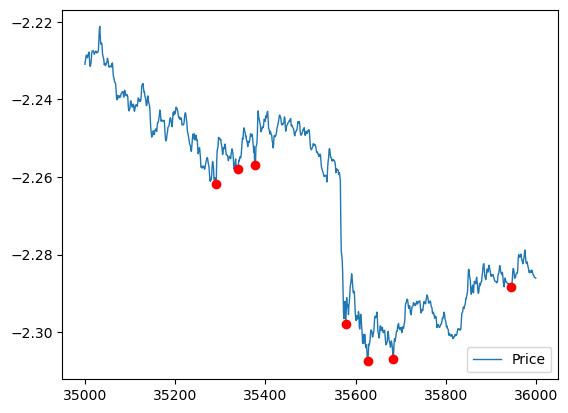

In [30]:
import matplotlib.pyplot as plt

i_start=35000
i_end=i_start+1000
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(np.arange(i_start,i_end), dt[i_start:i_end,0], '-', linewidth=1,
                 label='Price')
# line1.set_dashes(dashes)
plt.plot(np.arange(i_start,i_end)[dt[i_start:i_end,-1]==1], dt[i_start:i_end,0][dt[i_start:i_end,-1]==1], 'ro')


ax.legend(loc='lower right')
plt.show()

In [31]:
index_20percent=dt.shape[0]

In [32]:

XVALIDATION= dt[:index_20percent, :-1]
YVALIDATION= dt[:index_20percent,-1]
XTRAIN= dt[index_20percent:, 0:-1]
YTRAIN= dt[index_20percent:,-1]


XX0=XVALIDATION[YVALIDATION==0]
YY0=YVALIDATION[YVALIDATION==0]

INDEX_SEP=int(XX0.shape[0]/4)
XX0Train=XX0[INDEX_SEP:]
YY0Train=YY0[INDEX_SEP:]

XX0Val=XX0[:INDEX_SEP]
YY0Val=YY0[:INDEX_SEP]

XX1=XVALIDATION[YVALIDATION==1]
YY1=YVALIDATION[YVALIDATION==1]

INDEX_SEP=int(XX1.shape[0]/4)
XX1Train=XX1[INDEX_SEP:]
YY1Train=YY1[INDEX_SEP:]

XX1Val=XX1[:INDEX_SEP]
YY1Val=YY1[:INDEX_SEP]


accuracy0 = model.evaluate(XX0, YY0)
accuracy1 = model.evaluate(XX1, YY1)
accuracy = model.evaluate(XVALIDATION, YVALIDATION)
maxaccuracy = model.evaluate(dt[:,:-1], dt[:,-1])

print(f"class 0: {format(accuracy0[1]*100,'0.2f')} %")
print(f"class 1: {format(accuracy1[1]*100,'0.2f')} %")
print(f"FULL class : {format(accuracy[1]*100,'0.2f')} %")
print(f"FULL class with all data: {format(maxaccuracy[1]*100,'0.2f')} %")

#accuracy = model.evaluate(dt[:,0:-1], dt[:,-1])


1827/1827 [==============================] - 6s 3ms/step - loss: inf - accuracy: 0.9918
class 0: 100.00 %
class 1: 0.00 %
FULL class : 99.18 %
FULL class with all data: 99.18 %


In [ ]:
# dftest=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,buy_pourcent=0.4,sell_pourcent=SELL_PERCENT)
dftest=df
print("df original shape "+str(dftest.shape))
print(f"df original shape buy mean : {dftest.buy.mean()*100}")
dftest=dftest.reset_index()
try:dftest.pop("num_index")
except: pass
try:dftest.pop("index")
except: pass
try:dftest.pop("date")
except: pass
dftest=data_shufler(dftest)            
gc.collect()
dftest=data_cleanup(dftest)
dftest=dftest.dropna()
df.pop("price");print("we work with no price")
df.pop("BTC_price")

In [ ]:
dftest.buy.mean()

In [35]:
#dtt=dftest.to_numpy(dtype=np.float32)
dtt=dt
#dt=df.to_numpy()
dtt=np.nan_to_num(dtt,nan=0)
#dt=dt.astype(np.float32)
dtt=np.nan_to_num(dtt, neginf=0) 
dtt=np.nan_to_num(dtt, posinf=0) 

### stats plus

In [36]:
prediction2=(model.predict( dtt[:, 0:-1])).round()

1827/1827 [==============================] - 7s 4ms/step


In [37]:
ixx=dtt.shape[0]

In [38]:
False_prediction=dtt[:ixx,-1][(prediction2[:ixx].transpose()[0]!=dtt[:ixx])]
True_prediction=dtt[:ixx,-1][(prediction2[:ixx].transpose()[0]==dtt[:ixx])]

In [45]:
dtt[:,-1].mean()*100

0.8196300826966763

In [44]:
fp0=False_prediction[False_prediction==0].shape[0]*100/ixx #### it mean that 11.73 of the 0 class are wrong the buyed witch lead the losses
print( f"Prediction mean :{prediction2.mean()*100} %"+'#### the colose to 50 the better')
print( f"False prediction class 0 :{fp0} %"+'#### it mean that x of the 0 class are wrong the buyed witch lead the losses')
fp1=False_prediction[False_prediction==1].shape[0]*100/ixx   #### we don't buy x % of the correct chanses
print( f"False prediction class 1 :{fp1} %"+'#### we don\'t buy x % of the correct chanses')
trp0=True_prediction[True_prediction==0].shape[0]*100/ixx   #### it mean that 40 % of class 0 are predicted correctly
trp1=True_prediction[True_prediction==1].shape[0]*100/ixx     #### the only buying correct of all
print( f"True prediction class 0 :{trp0} %"+'#### it mean that 40 % of class 0 are predicted correctly')
print( f"True prediction class 1 :{trp1} %"+'#### the only buying correct of all')
print(f"successful buy pourcent of unsuccessfull: {100*trp1/(trp1+fp1)}  %")


Prediction mean :0.0 %#### the colose to 50 the better
False prediction class 0 :99.18036994575726 %#### it mean that x of the 0 class are wrong the buyed witch lead the losses
False prediction class 1 :0.8196300542427405 %#### we don't buy x % of the correct chanses
True prediction class 0 :0.0 %#### it mean that 40 % of class 0 are predicted correctly
True prediction class 1 :0.0 %#### the only buying correct of all
successful buy pourcent of unsuccessfull: 0.0  %


In [42]:
Y=dtt[:,-1]

In [43]:
model.evaluate(dt[:index_20percent,:-1], Y[:index_20percent]) #3-> 66.76 / 4 -> 65.75


1827/1827 [==============================] - 8s 4ms/step - loss: inf - accuracy: 0.9918


[inf, 0.9918037056922913]